# Bài tập tự thực hành 1

In [75]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')

## Nhập dữ liệu

In [76]:
df= pd.read_csv("pd_speech_features.csv")
df.head()
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

In [77]:
X = df.drop('class', axis=1)
y = df['class']

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. Giảm số chiều xuống 1 bằng phương pháp LDA và xuống 2 bằng phương pháp PCA

### Dùng PCA

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, train_size=500, random_state=42, stratify=y
)

In [81]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [90]:
y_pred_pca = model.predict(X_test)

Accuracy:  0.796875
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.34      0.46        65
           1       0.81      0.95      0.88       191

    accuracy                           0.80       256
   macro avg       0.76      0.65      0.67       256
weighted avg       0.78      0.80      0.77       256



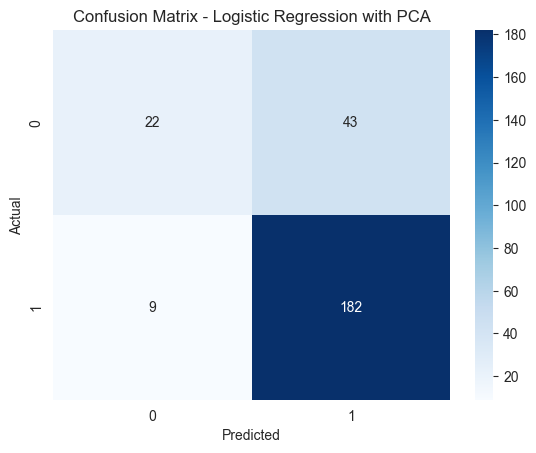

In [91]:
print("Accuracy: ", accuracy_score(y_test, y_pred_pca))
print("Classification Report: \n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()

### Dùng LDA

In [98]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, train_size=500, random_state=42, stratify=y
)

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [102]:
y_pred_lda = model.predict(X_test)

Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       191

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



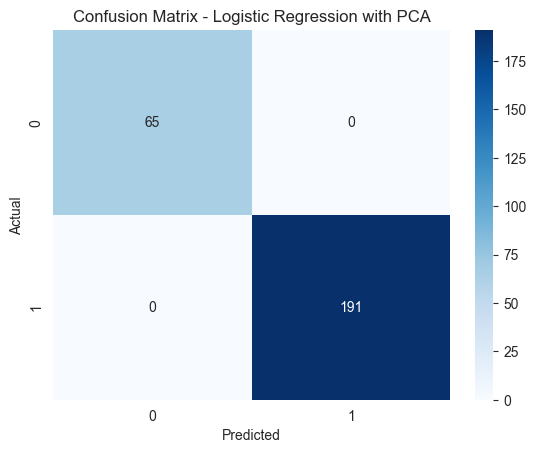

In [104]:
print("Accuracy: ", accuracy_score(y_test, y_pred_lda))
print("Classification Report: \n", classification_report(y_test, y_pred))

# 9. Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()

## 2. Sử dụng dữ liệu ban đầu, chia thành tập train/test rồi mới hạ chiều

### Phân loại sau khi chia train/test và chưa hạ chiều

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Với mô hình Gaussian Naive Bayes

In [108]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [109]:
y_pred_nb = nb.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))

Accuracy:  0.7513227513227513


#### Với mô hình Logistic Regression

In [110]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
y_pred_lr = lr.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))

Accuracy:  0.8412698412698413


### Thử với dữ liệu đã hạ chiều bằng PCA 

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42, stratify=y
)

#### Với mô hình Gaussian Naive Bayes

In [125]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [126]:
y_pred_pca_nb = nb.predict(X_test)
print("Accuracy", accuracy_score(y_pred_pca_nb, y_test))

Accuracy 0.798941798941799


#### Với mô hình Logistic Regression

In [127]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [128]:
y_pred_pca_lr = lr.predict(X_test)
print("Accuracy", accuracy_score(y_pred_pca_lr, y_test))

Accuracy 0.798941798941799


### Thử với dữ liệu đã hạ chiều bằng LDA

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.25, random_state=42, stratify=y
)

#### Với mô hình Gaussian Naive Bayes

In [130]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_lda_nb = nb.predict(X_test)
print("Accuracy", accuracy_score(y_pred_lda_nb, y_test))

Accuracy 1.0


#### Với mô hình Logistic Naive Bayes

In [131]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lda_lr = lr.predict(X_test)
print("Accuracy", accuracy_score(y_pred_lda_lr, y_test))

Accuracy 1.0


# Bài tập tự thực hành 2

In [146]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Nhập dữ liệu

In [138]:
# set names to the paths because they're too long
data_path = ''
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [139]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)

    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

##  1. Lấy ra 5000 ảnh bất kỳ, giảm số chiều xuống còn 100 từ 784

In [140]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print(train_images.shape, train_labels.shape)

(5000, 784) (5000,)


In [145]:
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images)
print(train_images_scaled.shape)
pca = PCA(n_components=100)
train_images_pca = pca.fit_transform(train_images_scaled)
print(train_images_pca.shape)

(5000, 784)
(5000, 100)


## 2. Áp dụng Multinomial Logistic Regression

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    train_images,        # hoặc train_images_scaled nếu bạn chưa dùng PCA
    train_labels,
    test_size=0.3,           # 30% test
    random_state=42,         # để kết quả chia cố định
    stratify=train_labels    # giữ tỷ lệ lớp cân bằng
)

### a. Với dữ liệu nguyên bản

In [148]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [149]:
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Multinomial Logistic Regression):", acc)

Accuracy (Multinomial Logistic Regression): 0.87


### b. Dữ liệu đã qua giảm chiều

#### Áp dụng PCA giảm còn 100 chiều

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    train_images_pca,
    train_labels,
    test_size=0.3,
    random_state=42,
    stratify=train_labels
)

In [151]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [152]:
y_pred_pca = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred_pca)
print("Accuracy (Multinomial Logistic Regression):", acc)

Accuracy (Multinomial Logistic Regression): 0.8793333333333333


#### Áp dụng LDA giảm còn 8 chiều

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=8)
train_images_lda = lda.fit_transform(train_images_scaled, train_labels)
print(train_images_lda.shape)


(5000, 8)


In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    train_images_lda,        # hoặc train_images_scaled nếu bạn chưa dùng PCA
    train_labels,
    test_size=0.3,           # 30% test
    random_state=42,         # để kết quả chia cố định
    stratify=train_labels    # giữ tỷ lệ lớp cân bằng
)

In [156]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [157]:
y_pred_pca = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred_pca)
print("Accuracy (Multinomial Logistic Regression):", acc)

Accuracy (Multinomial Logistic Regression): 0.9193333333333333


# Bài tập tự thực hành 3

In [3]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.pyplot as plt
# path to the database - change it if needed
path = 'face_data\\face_data\\'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
'noglasses', 'normal', 'rightlight','sad',
'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X = np.zeros((D, N))
y = np.zeros(N, dtype=int)
# collect all data
count = 0
# there are 15 people
for person_id in range(1, 16):
    for state in states:
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        # then add image to dataset X
        y[count] = person_id
        X[:, count] = tmp.reshape(D)
        count += 1
print("Dữ liệu đọc xong:", X.shape, "Nhãn:", y.shape)

165 77760 243 320
Dữ liệu đọc xong: (77760, 165) Nhãn: (165,)


## Chuẩn hóa dữ liệu

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(77760, 165)


## a. Giảm số chiều xuống còn 135

### Sử dụng PCA

In [6]:
pca = PCA(n_components=135)
X_pca = pca.fit_transform(X_scaled.T)
print(X_pca.shape)

(165, 135)


### Sử dụng LDA

In [7]:
print(X_scaled.shape)

(77760, 165)


In [11]:
lda = LDA(n_components=10)
X_lda = lda.fit_transform(X_scaled.T, y_)
print("Sau LDA:", X_lda.shape)

Sau LDA: (165, 10)


## b. Áp dụng mô hình phân loại nhiều lớp Multinomial Logistic Regression và Naive Bayes, train/test = 0.7:0.3

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_, test_size=0.3, random_state=42, stratify=y
)

### Mô hình Mutilnomial Regression và Naïve Bayes với PCA


In [35]:
log_reg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000
)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.28
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.00      0.00      0.00         6
           2       1.00      0.25      0.40         4
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         6
           7       0.14      0.33      0.20         3
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.50      0.12      0.20         8

    accuracy                           0.28        50
   macro avg       0.36      0.24      0.26        50
weighted avg       0.44      0.28      0.31        50



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       1.00      0.60      0.75         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.30      0.50      0.38         6
           7       0.33      0.33      0.33         3
           8       0.20      0.25      0.22         4
           9       0.07      0.33      0.12         3
          10       0.00      0.00      0.00         8

    accuracy                           0.18        50
   macro avg       0.17      0.18      0.16        50
weighted avg       0.18      0.18      0.16        50



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

### Mô hình Mutilnomial Regression và Naïve Bayes với LDA


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y_, test_size=0.3, random_state=42, stratify=y
)

In [38]:
log_reg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000
)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91         6
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         5
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       0.88      0.88      0.88         8

    accuracy                           0.92        50
   macro avg       0.85      0.86      0.85        50
weighted avg       0.93      0.92      0.92        50



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         8

    accuracy                           0.96        50
   macro avg       0.89      0.89      0.89        50
weighted avg       0.96      0.96      0.96        50



## c. Coi 165 ảnh là train, lấy 5 ảnh bất kỳ đưa về chiều gốc rồi dịch sang trái, sau đó dự đoán

### Lấy ra các biểu cảm (label)

In [22]:
num_people = 15
num_states = len(states)

# Nhãn biểu cảm cho toàn bộ 165 ảnh
y_ = np.tile(np.arange(num_states), num_people)
# Nếu muốn tên biểu cảm
y_name = np.tile(states, num_people)

print(y_[:20])        # 0 1 2 ... 10 0 1 2 ...
print(y_name[:20])

[ 0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8]
['centerlight' 'glasses' 'happy' 'leftlight' 'noglasses' 'normal'
 'rightlight' 'sad' 'sleepy' 'surprised' 'wink' 'centerlight' 'glasses'
 'happy' 'leftlight' 'noglasses' 'normal' 'rightlight' 'sad' 'sleepy']


### Chạy mô hình với dữ liệu đã được chuẩn hóa

In [17]:
clf_log = LogisticRegression(max_iter=1000, multi_class='multinomial')
clf_log.fit(X_scaled.T, y_)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


### Lấy 5 ảnh bất kỳ, đưa v shape gốc và dịch phải

In [32]:
idx_test = np.random.choice(X_lda.shape[1], 5, replace=False)

In [34]:
import cv2

X_new = []
for i in idx_test:
    img = X[:, i].reshape(h, w).astype(np.uint8)  # reshape về 2D

    # Dịch sang phải 40 pixel (theo hướng người nhìn)
    M = np.float32([[1, 0, 40], [0, 1, 0]])
    img_shifted = cv2.warpAffine(img, M, (w, h))

    X_new.append(img_shifted.flatten())  # flatten để dự đoán
X_new = np.array(X_new)  # shape (5, D)

### Dự đoán và in ra kết quả

In [35]:
y_pred_log = clf_log.predict(X_new)
for i, idx in enumerate(idx_test):
    print(f"Ảnh {idx} → Logistic Regression dự đoán: {y_name[y_pred_log[i]]} || Nhãn thật: {y_name[y_[idx]]}")

Ảnh 6 → Logistic Regression dự đoán: rightlight || Nhãn thật: rightlight
Ảnh 1 → Logistic Regression dự đoán: rightlight || Nhãn thật: glasses
Ảnh 2 → Logistic Regression dự đoán: rightlight || Nhãn thật: happy
Ảnh 7 → Logistic Regression dự đoán: rightlight || Nhãn thật: sad
Ảnh 3 → Logistic Regression dự đoán: leftlight || Nhãn thật: leftlight
